In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
train=pd.read_csv("C:/Users/yjp13/Desktop/titanic/train.csv")
test=pd.read_csv("C:/Users/yjp13/Desktop/titanic/test.csv")

### EDA 

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualization

# 수치형: Age, SibSp, Parch, Fare
# 범주형: Pclass, Sex, Embarked

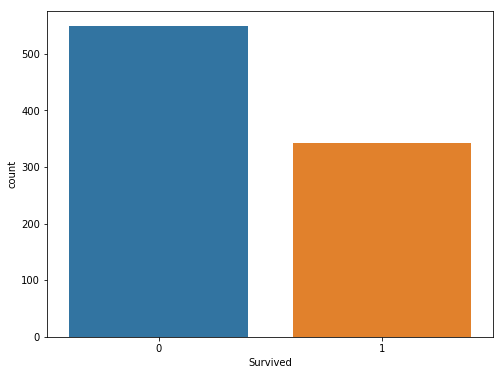

In [7]:
f, ax=plt.subplots(figsize=(8,6))
sns.countplot(x="Survived", data=train)


In [8]:
n=len(train)
surv_0=len(train[train['Survived']==0])
surv_1=len(train[train['Survived']==1])

print("{}% of passenger survived in train datasets: " .format(surv_0*100/n))
print("{}% of passenger died in train datasets: " .format(surv_1*100/n))

61.61616161616162% of passenger survived in train datasets: 
38.38383838383838% of passenger died in train datasets: 


In [9]:
cat=['Pclass', 'Sex','Embarked']
num=['Age','SibSp','Parch','Fare']

In [10]:
corr_df=train[num]

cor=corr_df.corr(method='pearson')
print(cor)

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


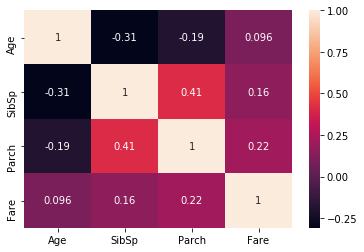

In [11]:
sns.heatmap(train[num].corr(), annot=True)

#### no strong correlation btw any two variables
#### strong correlation is SibSP+ Parch

### 범주형은 target값과 함께 chi-square test

In [12]:
csq=chi2_contingency(pd.crosstab(train["Survived"],train["Sex"]))
print("P-value: ", csq[1])

P-value:  1.19735706278e-58


In [13]:
csq2=chi2_contingency(pd.crosstab(train["Survived"],train["Pclass"]))
print("P-value: ", csq2[1])

P-value:  4.5492517113e-23


In [14]:
csq3=chi2_contingency(pd.crosstab(train["Survived"],train["Embarked"]))
print("P-value: ", csq3[1])

P-value:  1.76992228412e-06


##### P values for features Sex, Embarked and Pclass as very low. 
##### We can reject our Null Hypothesis which is these features are independent
##### and have no relationship with target variable

# Visualization

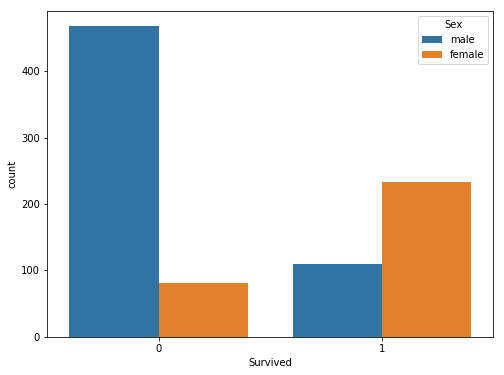

In [15]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Sex')

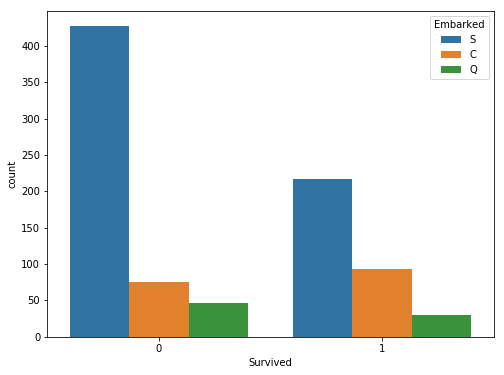

In [16]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Embarked')

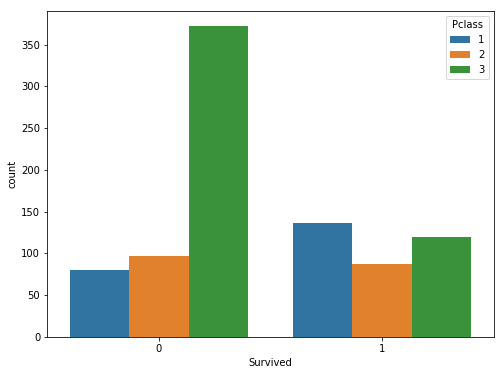

In [17]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Survived', data=train, hue='Pclass')

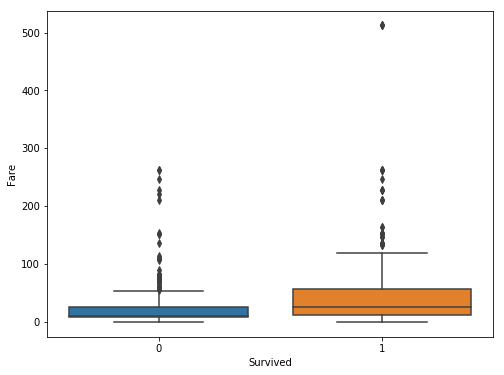

In [18]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Fare', data=train)

### 결측값 처리

In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
train["Age"]=train["Age"].fillna(train["Age"].median())

In [22]:
test["Age"]=test["Age"].fillna(test["Age"].median())

In [23]:
del_col=["Cabin"]
for c in del_col:
    del train[c]
    del test[c]

### dummy variable 만들기

In [24]:
### id, 이름 삭제
del_col1=["PassengerId","Name","Ticket"]
for c in del_col1:
    del train[c]
    del test[c]

In [25]:
y=train["Survived"]
del train["Survived"]

In [26]:
# cols=['Pclass','Sex','Embarked']
# for c in cols:
#     train[c]=train[c].astype('category')
#     test[c]=test[c].astype('category')

In [27]:
test["Fare"]=test["Fare"].fillna(test["Fare"].median())

In [28]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [29]:
print(train.shape)
print(test.shape)

(891, 10)
(418, 10)


In [30]:
train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


### RandomForest Model

In [31]:
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=2019)

In [32]:
rfc=RandomForestClassifier(random_state=2019)

In [39]:
param_grid = { 
    'n_estimators': [200,250,300],
    'max_depth' : [6,7,8],
    'criterion' :['gini']
}

In [40]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 250, 300], 'max_depth': [6, 7, 8], 'criterion': ['gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 250}

In [42]:
rfc1=RandomForestClassifier(random_state=2019, n_estimators= 250, max_depth=6, criterion='gini')

In [43]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=2019, verbose=0,
            warm_start=False)

In [44]:
y_pred=rfc1.predict(test)

In [45]:
sub=pd.read_csv("C:/Users/yjp13/Desktop/titanic/gender_submission.csv")

In [65]:
sub["Survived"]=y_pred

In [76]:
sub.to_csv("RandomForest+GridSearch(titanic).csv", index=False)

### Gradient Boosting Model

In [78]:
x_train, x_test, y_train, y_test = train_test_split(train, y, random_state=42)

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gbc=GradientBoostingClassifier(random_state=42)

In [92]:
param_grid = { 
    'n_estimators': [200, 250],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8]}


In [93]:
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 5)
CV_gbc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 250], 'max_features': ['auto'], 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [94]:
CV_rfc.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 250}

In [97]:
gbc1=GradientBoostingClassifier(random_state=42, max_features='auto', n_estimators= 250, max_depth=6)

In [98]:
gbc1.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=250,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [99]:
y_pred=gbc1.predict(test)

In [100]:
sub["Survived"]=y_pred

In [102]:
sub.to_csv("GradientBoosting+GridSearch.csv",index=False)